In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from sklearn import datasets

import matplotlib.pyplot as plt

In [2]:
torch.set_default_tensor_type(torch.cuda.FloatTensor)

# Prepared data

In [3]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

In [4]:
X = torch.from_numpy(X_numpy.astype(np.float32)).cuda()
y = torch.from_numpy(y_numpy.astype(np.float32)).view(100,1).cuda()

In [5]:
n_sample,n_features = X.shape[0], X.shape[1]
n_sample,n_features 

(100, 1)

# Constants

In [6]:
input_size = n_features
output_size = 1
learning_rate = 0.01
n_iters = 100

# Model

In [37]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        
        self.linear = nn.Sequential(
                                    nn.Linear(input_dim,output_dim)
                                    )
    def forward(self,x):
        return self.linear(x)

In [38]:
model = LinearRegression(input_size,output_size)

# Loss & optimizer

In [39]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# Training loop

In [40]:
for epoch in range(n_iters):
    
    # Predict
    y_pred = model(X)
    # Compare
    loss = criterion(y_pred,y)
    # Learn
    dw = loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 ==0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: loss = {loss:.8f}')
    

epoch 1: loss = 5845.93847656
epoch 11: loss = 4325.98193359
epoch 21: loss = 3227.91845703
epoch 31: loss = 2433.70898438
epoch 41: loss = 1858.64318848
epoch 51: loss = 1441.83093262
epoch 61: loss = 1139.43835449
epoch 71: loss = 919.86590576
epoch 81: loss = 760.30334473
epoch 91: loss = 644.26464844


# Plot

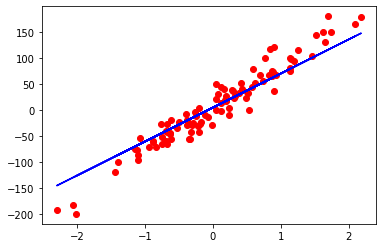

In [41]:
with torch.no_grad():
    predict = model(X).cpu().numpy()
    plt.plot(X_numpy,y_numpy,'ro')
    plt.plot(X_numpy,predict,'b')
    plt.show()